# Analisis iris_dataset

Importamos las librerias necesarias

In [107]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
from sklearn.mixture import GaussianMixture
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score
import seaborn as sns
from pandas.plotting import scatter_matrix
from sklearn import preprocessing

Cargamos y visualizamos el dataset de iris

In [93]:

from sklearn.datasets import load_iris

iris = load_iris()
data= pd.DataFrame(iris.data)
data.columns = ['Sepal_Length', 'Sepal_Width', 'Petal_Length', 'Petal_Width']


# Denotamos el output que corresponde al tipo de flor

y = pd.DataFrame(iris.target)
y.columns = ['Targets']


Visualizamos el dataset

In [95]:
data

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


Podemos observar que existen 4 caracterísitcas principales como el largo y ancho de los sepalos y petalos. Se realizará una visualización a traves de Scatter Matrix

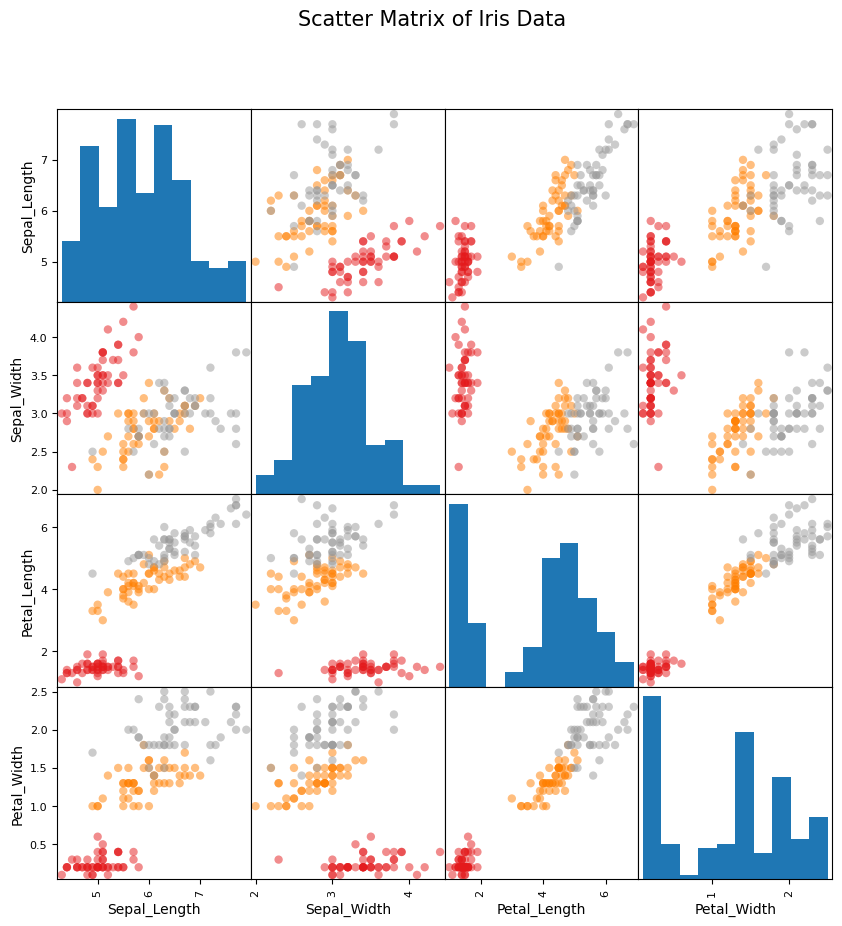

In [106]:
scatter_matrix(data, c=y['Targets'], figsize=(10, 10), marker='o', cmap=plt.cm.Set1)
plt.suptitle('Scatter Matrix of Iris Data', fontsize=15)
plt.show()

Podemos observar que existe una separación evidente al relacionar el largo y el ancho del petalo

#### A continuación se programará Gaussian Mixtures Model (GMM)

Se normaliza la data para que la media tenga valor 0 y la desviación estandar 1

In [132]:
scaler = preprocessing.StandardScaler()
scaler.fit(data)


StandardScaler()

In [133]:
scaled_data = scaler.transform(data)
DataSCALED = pd.DataFrame(scaled_data, columns= data.columns)



In [134]:
GMM = GaussianMixture(n_components = 3 )
GMM_y = gmm.fit_predict(DataSCALED)
labels = np.zeros_like(clusters)

for i in range(3):
    categoria = (GMM_y == i)
    labels[categoria] = mode(iris.target[categoria])[0]
    
acc = accuracy_score(iris.target, labels)
print("La exactitud del modeo está dada por un", acc)

La exactitud del modeo está dada por un 0.9666666666666667


C:\Users\ricar\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


C:\Users\ricar\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


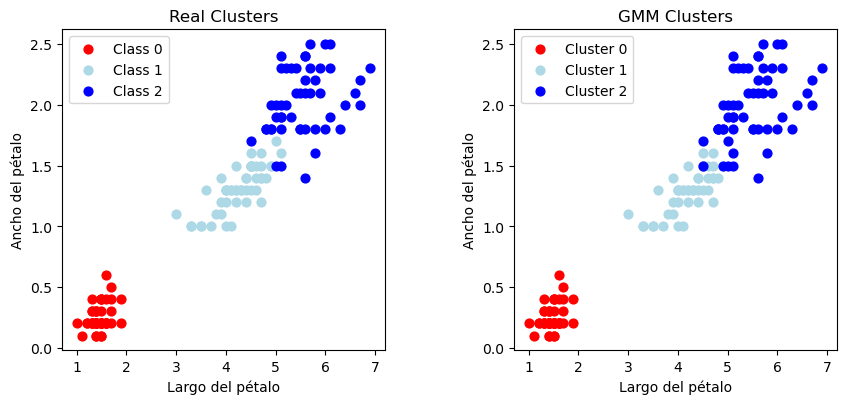

In [151]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.mixture import GaussianMixture

# Cargar el conjunto de datos Iris
iris = load_iris()
data = pd.DataFrame(iris.data, columns=['Sepal_Length', 'Sepal_Width', 'Petal_Length', 'Petal_Width'])

# Ajustar un modelo de mezcla gaussiana (Gaussian Mixture Model)
gmm = GaussianMixture(n_components=3)
gmm.fit(data)

# Obtener las etiquetas de clusters del modelo GMM
gmm_y = gmm.predict(data)

# Definir los colores en orden: rojo, celeste y azul
colors = ['red', 'lightblue', 'blue']

# Ajustar el tamaño de la figura
plt.figure(figsize=(10, 10))

# Plot de las clasificaciones originales usando las características del pétalo
plt.subplot(2, 2, 1)
for i in range(3):
    plt.scatter(data.Petal_Length[y.Targets == i], data.Petal_Width[y.Targets == i], c=colors[i], s=40, label=f'Class {i}')
plt.title('Real Clusters')
plt.xlabel('Largo del pétalo')
plt.ylabel('Ancho del pétalo')
plt.legend()

# Plot de las clasificaciones del GMM
plt.subplot(2, 2, 2)
for i in range(3):
    plt.scatter(data.Petal_Length[gmm_y == i], data.Petal_Width[gmm_y == i], c=colors[i], s=40, label=f'Cluster {i}')
plt.subplots_adjust(hspace=0.4, wspace=0.4)
plt.title('GMM Clusters')
plt.xlabel('Largo del pétalo')
plt.ylabel('Ancho del pétalo')
plt.legend()

plt.show()


Se puede observar que las mezclas gaussianas presentan un 96,6% de exactitud, esto se puede ver reflejado en la comparación de gráficos donde se aprecia la clasificación original en comparación con el GMM